# <span style="color:navy"> "Forecasting Cancer Death Rate in the, USA</span>

In [1]:
import pandas as pd
import numpy as np
import zipfile
import kaggle

In [3]:
# download the dataset directly from the Kaggle website
!kaggle datasets download -d varunraskar/cancer-regression

Dataset URL: https://www.kaggle.com/datasets/varunraskar/cancer-regression
License(s): MIT




  0%|          | 0.00/339k [00:00<?, ?B/s]
100%|##########| 339k/339k [00:01<00:00, 264kB/s]
100%|##########| 339k/339k [00:01<00:00, 264kB/s]


In [2]:
# Name of the zip file
zipfile_name = 'cancer-regression.zip'

# Extract the contents of the zip file
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

print("Extraction completed!")

Extraction completed!


In [2]:
#Read the extracted csv files

region = pd.read_csv('avg-household-size.csv')
cancer = pd.read_csv('cancer_reg.csv')

In [3]:
#examine a portion of the files

cancer.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [4]:
region.head()

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"


## <span style="color:brown">1. Data Wrangling</span>

In [5]:
#let's get the overall picture of both files

cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  percentmarried           3047 non-null   float64
 14  pctnohs18_24            

In [8]:
region.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   statefips         3220 non-null   int64  
 1   countyfips        3220 non-null   int64  
 2   avghouseholdsize  3220 non-null   float64
 3   geography         3220 non-null   object 
dtypes: float64(1), int64(2), object(1)
memory usage: 100.8+ KB


In [9]:
#let's verify whether the files contain null values and handle them

cancer.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarri

In [6]:
# The columns 'pctsomecol18_24' and 'pctprivatecoveragealone' have respectively 2285 and 609 null values
# let's drop them

cancer.drop(['pctsomecol18_24', 'pctprivatecoveragealone' ], axis=1, inplace=True)
cancer.reset_index(drop=True, inplace=True)

In [7]:
# replace the null values in the column 'pctemployed16_over' with the mean value of the column

cancer['pctemployed16_over'] = cancer['pctemployed16_over'].fillna(cancer['pctemployed16_over'].median(axis=0))

In [8]:
cancer.isnull().sum()

avganncount               0
avgdeathsperyear          0
target_deathrate          0
incidencerate             0
medincome                 0
popest2015                0
povertypercent            0
studypercap               0
binnedinc                 0
medianage                 0
medianagemale             0
medianagefemale           0
geography                 0
percentmarried            0
pctnohs18_24              0
pcths18_24                0
pctbachdeg18_24           0
pcths25_over              0
pctbachdeg25_over         0
pctemployed16_over        0
pctunemployed16_over      0
pctprivatecoverage        0
pctempprivcoverage        0
pctpubliccoverage         0
pctpubliccoveragealone    0
pctwhite                  0
pctblack                  0
pctasian                  0
pctotherrace              0
pctmarriedhouseholds      0
birthrate                 0
dtype: int64

In [9]:
# let's do the same for the region file

region.isnull().sum()

statefips           0
countyfips          0
avghouseholdsize    0
geography           0
dtype: int64

In [10]:
#check for duplicates
cancer.duplicated().sum()

0

In [11]:
region.duplicated().sum()

0

## <span style="color:brown">2. Exploratory Data Analysis</span>

In [12]:
# basic statistics for numerical columns
cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
avganncount,3047.0,606.338544,1416.356223,6.000000,76.000000,171.000000,518.000000,3.815000e+04
avgdeathsperyear,3047.0,185.965868,504.134286,3.000000,28.000000,61.000000,149.000000,1.401000e+04
target_deathrate,3047.0,178.664063,27.751511,59.700000,161.200000,178.100000,195.200000,3.628000e+02
incidencerate,3047.0,448.268586,54.560733,201.300000,420.300000,453.549422,480.850000,1.206900e+03
medincome,3047.0,47063.281917,12040.090836,22640.000000,38882.500000,45207.000000,52492.000000,1.256350e+05
popest2015,3047.0,102637.370528,329059.220504,827.000000,11684.000000,26643.000000,68671.000000,1.017029e+07
povertypercent,3047.0,16.878175,6.409087,3.200000,12.150000,15.900000,20.400000,4.740000e+01
studypercap,3047.0,155.399415,529.628366,0.000000,0.000000,0.000000,83.650776,9.762309e+03
medianage,3047.0,45.272333,45.304480,22.300000,37.700000,41.000000,44.000000,6.240000e+02
medianagemale,3047.0,39.570725,5.226017,22.400000,36.350000,39.600000,42.500000,6.470000e+01


In [13]:
# basic stats for categorical column

cancer.describe(include='object').T

,count,unique,top,freq
binnedinc,3047,10,"(54545.6, 61494.5]",306
geography,3047,3047,"Kitsap County, Washington",1


### I. Numerical variables

array([[<Axes: title={'center': 'avganncount'}>,
        <Axes: title={'center': 'avgdeathsperyear'}>,
        <Axes: title={'center': 'target_deathrate'}>,
        <Axes: title={'center': 'incidencerate'}>,
        <Axes: title={'center': 'medincome'}>],
       [<Axes: title={'center': 'popest2015'}>,
        <Axes: title={'center': 'povertypercent'}>,
        <Axes: title={'center': 'studypercap'}>,
        <Axes: title={'center': 'medianage'}>,
        <Axes: title={'center': 'medianagemale'}>],
       [<Axes: title={'center': 'medianagefemale'}>,
        <Axes: title={'center': 'percentmarried'}>,
        <Axes: title={'center': 'pctnohs18_24'}>,
        <Axes: title={'center': 'pcths18_24'}>,
        <Axes: title={'center': 'pctbachdeg18_24'}>],
       [<Axes: title={'center': 'pcths25_over'}>,
        <Axes: title={'center': 'pctbachdeg25_over'}>,
        <Axes: title={'center': 'pctemployed16_over'}>,
        <Axes: title={'center': 'pctunemployed16_over'}>,
        <Axes: title

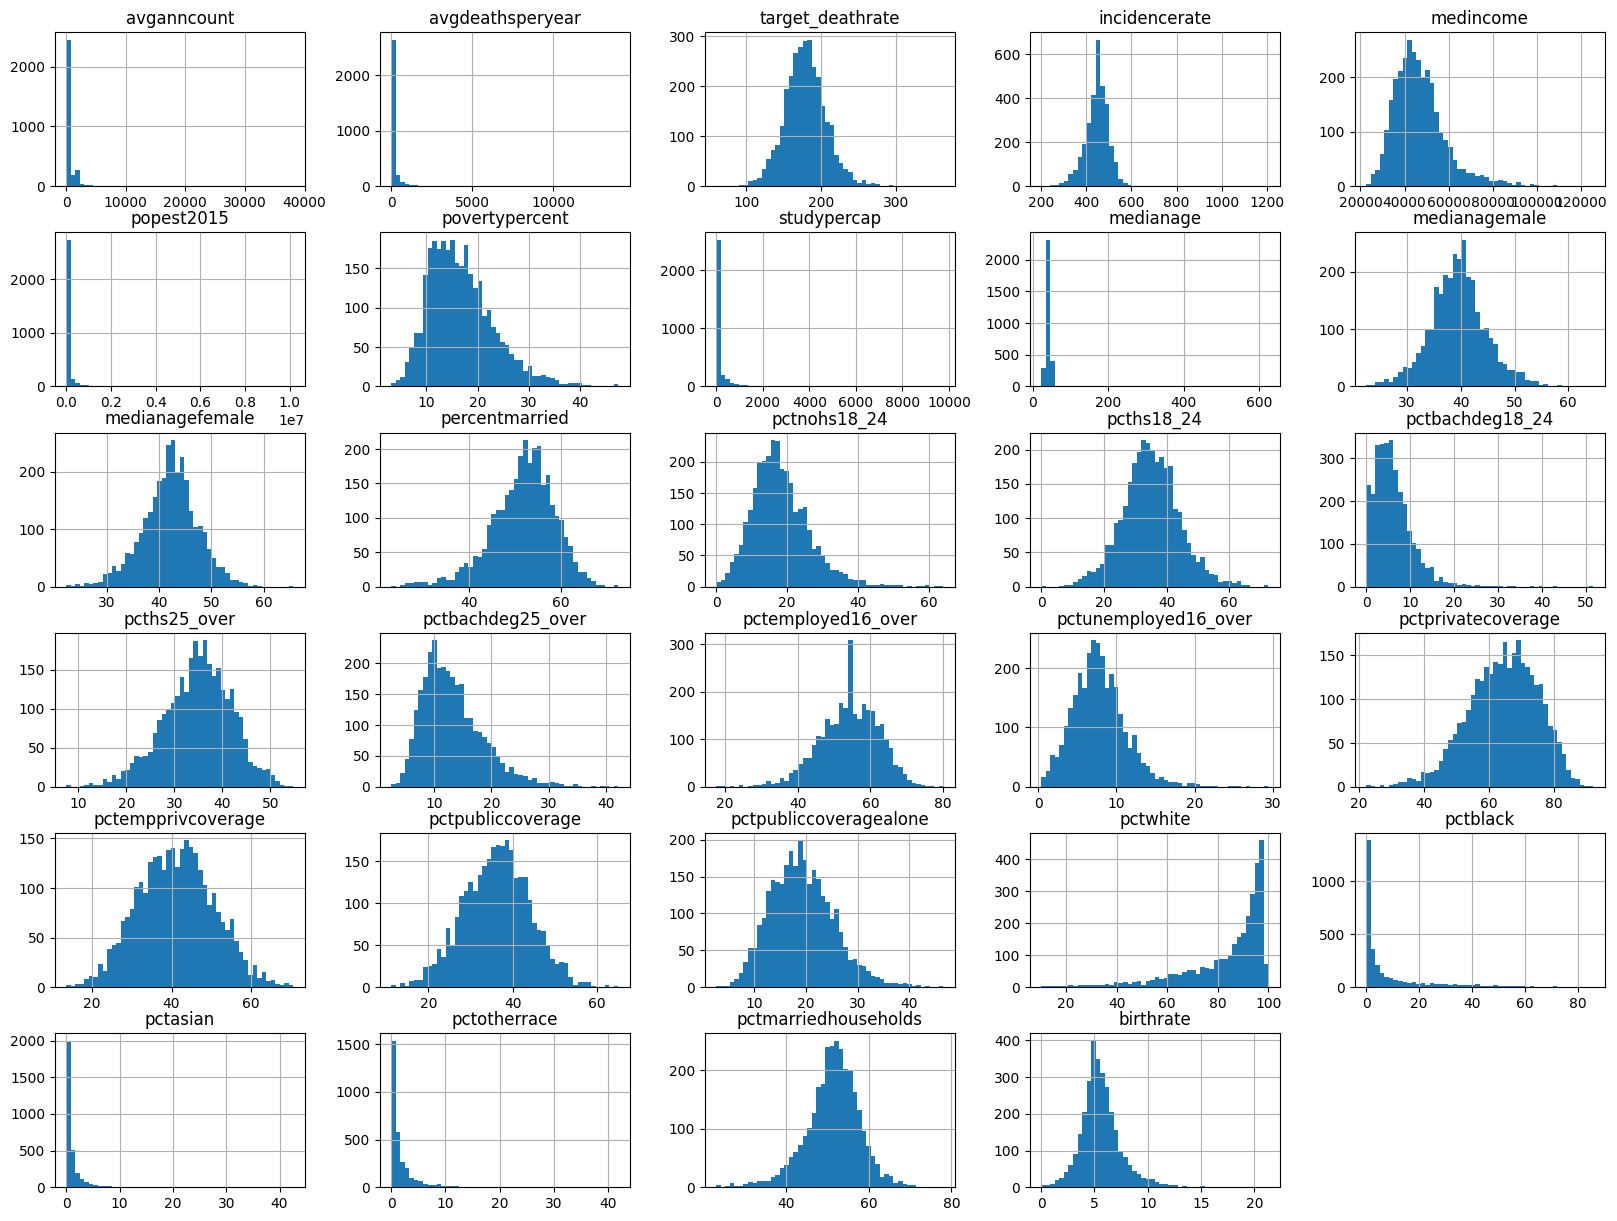

In [14]:
# Let's build a histogram to examine the distribution of each feature.
# we can have an idea of the shape of each variable, their central tendency, they spread
# and the presence of outliers

cancer.hist(figsize=(20, 15), bins=50)

<p>1. Many variables including 'medincome', 'povertypercent', 'percentmarried', 'pctbatchdeg18_24 are skewed'
    suggesting the need to use a different scale, hence, standardization;</p></br>
<p>2. The following columns seem to have extreme outliers (avganncount, avgdeathsperyear, popest2015, studypercap, medianage,pctblack, pctasian, pctotherrace)</p>
    

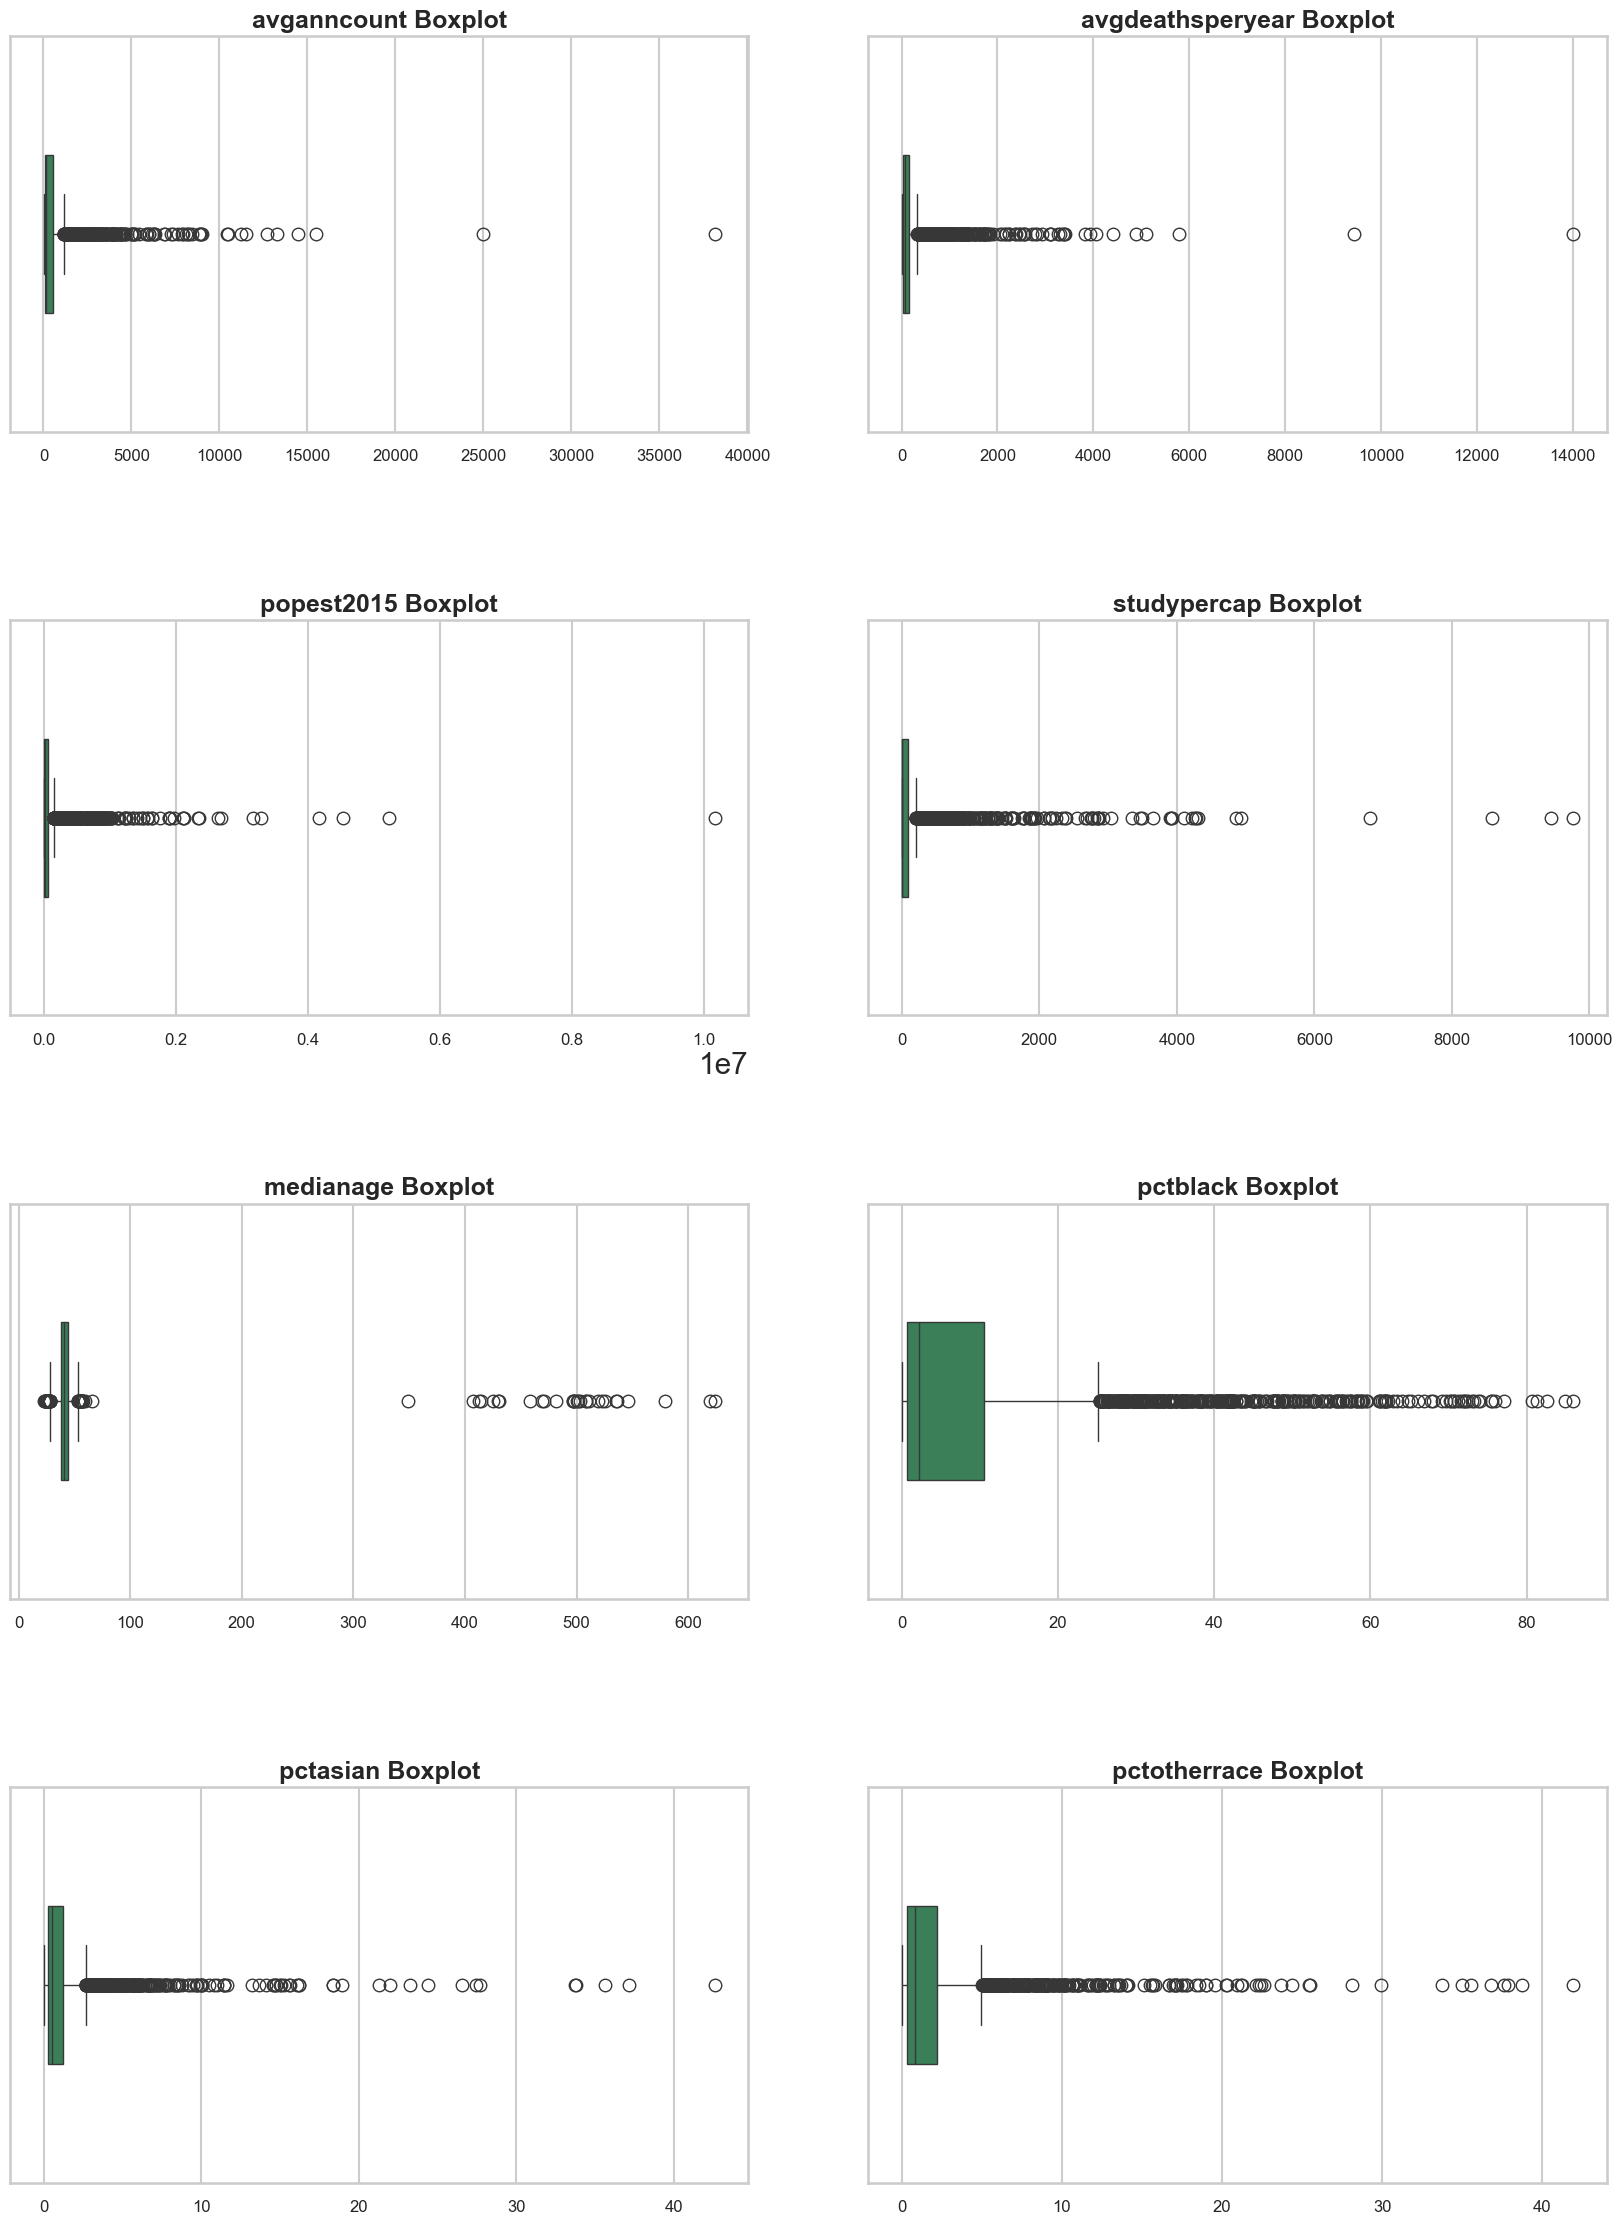

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = [
    'avganncount', 'avgdeathsperyear', 'popest2015', 
    'studypercap', 'medianage', 'pctblack', 
    'pctasian', 'pctotherrace'
]

# Use a clean Seaborn style
sns.set_style("whitegrid")
sns.set_context("talk", font_scale=1.3)

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(18, 24))
axes = axes.flatten()

for i, col in enumerate(columns):
    sns.boxplot(x=cancer[col], color='seagreen', ax=axes[i], width=0.4)
    axes[i].set_title(f'{col} Boxplot', fontsize=18, fontweight="bold")
    axes[i].set_xlabel('')
    axes[i].tick_params(axis='x', labelsize=12)
    
# Remove unused axes if any
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(pad=3)
plt.show()

### II. Categorical variables

In [17]:
cancer['binnedinc'].value_counts()

binnedinc
(54545.6, 61494.5]    306
[22640, 34218.1]      306
(45201, 48021.6]      306
(48021.6, 51046.4]    305
(42724.4, 45201]      305
(51046.4, 54545.6]    305
(37413.8, 40362.7]    304
(40362.7, 42724.4]    304
(34218.1, 37413.8]    304
(61494.5, 125635]     302
Name: count, dtype: int64

In [18]:
# Replace original column with midpoint values

import re

# convert string intervals into midpoints
cancer["binnedinc"] = cancer["binnedinc"].apply(
    lambda x: (float(re.findall(r"[-+]?\d*\.\d+|\d+", x)[0]) + 
               float(re.findall(r"[-+]?\d*\.\d+|\d+", x)[1])) / 2
)

In [19]:
cancer[['binnedinc']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   binnedinc  3047 non-null   float64
dtypes: float64(1)
memory usage: 23.9 KB


<Axes: ylabel='binnedinc'>

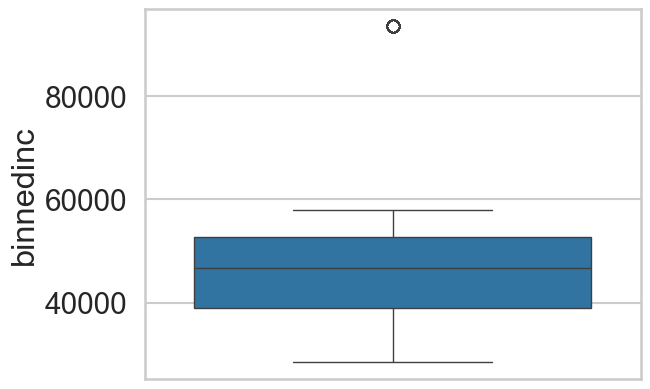

In [20]:
#let's check the boxplot of 'binnedinc'

sns.boxplot(cancer['binnedinc'])

In [24]:
# Replace all outliers with their respective median value

def replace_outliers_with_median(cancer, columns):
    """
    Replaces outliers in given columns with the column's median value 
    using the IQR method.
    
    """
    for col in columns:
        Q1 = cancer[col].quantile(0.25)
        Q3 = cancer[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        median_value = cancer[col].median()

        # Replace outliers with median
        cancer[col] = cancer[col].apply(lambda x: median_value if (x < lower_bound) or (x > upper_bound) else x)
    
    return cancer


# Example usage:
columns_to_fix = ['avganncount', 'avgdeathsperyear', 'popest2015', 'studypercap', 'medianage', 'pctblack',
                 'pctasian', 'pctotherrace']
cancer_cleaned = replace_outliers_with_median(cancer, columns_to_fix)

In [25]:
cancer_cleaned.shape

(3047, 31)

### III The target value

In [49]:
print(f"Maximum value {cancer_cleaned['target_deathrate'].max()} \n") 
print(f"Minimum value {cancer_cleaned['target_deathrate'].min()} \n") 
print(f"Mean value {cancer_cleaned['target_deathrate'].mean()}")

Maximum value 362.8 

Minimum value 59.7 

Mean value 178.66406301279943


<Axes: xlabel='target_deathrate', ylabel='Count'>

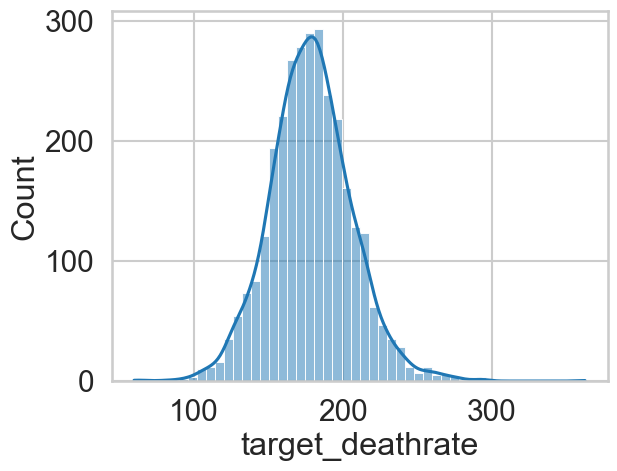

In [27]:
sns.histplot(cancer_cleaned['target_deathrate'], bins=50, kde = True)

### IV. Multivariate Analysis

<Axes: >

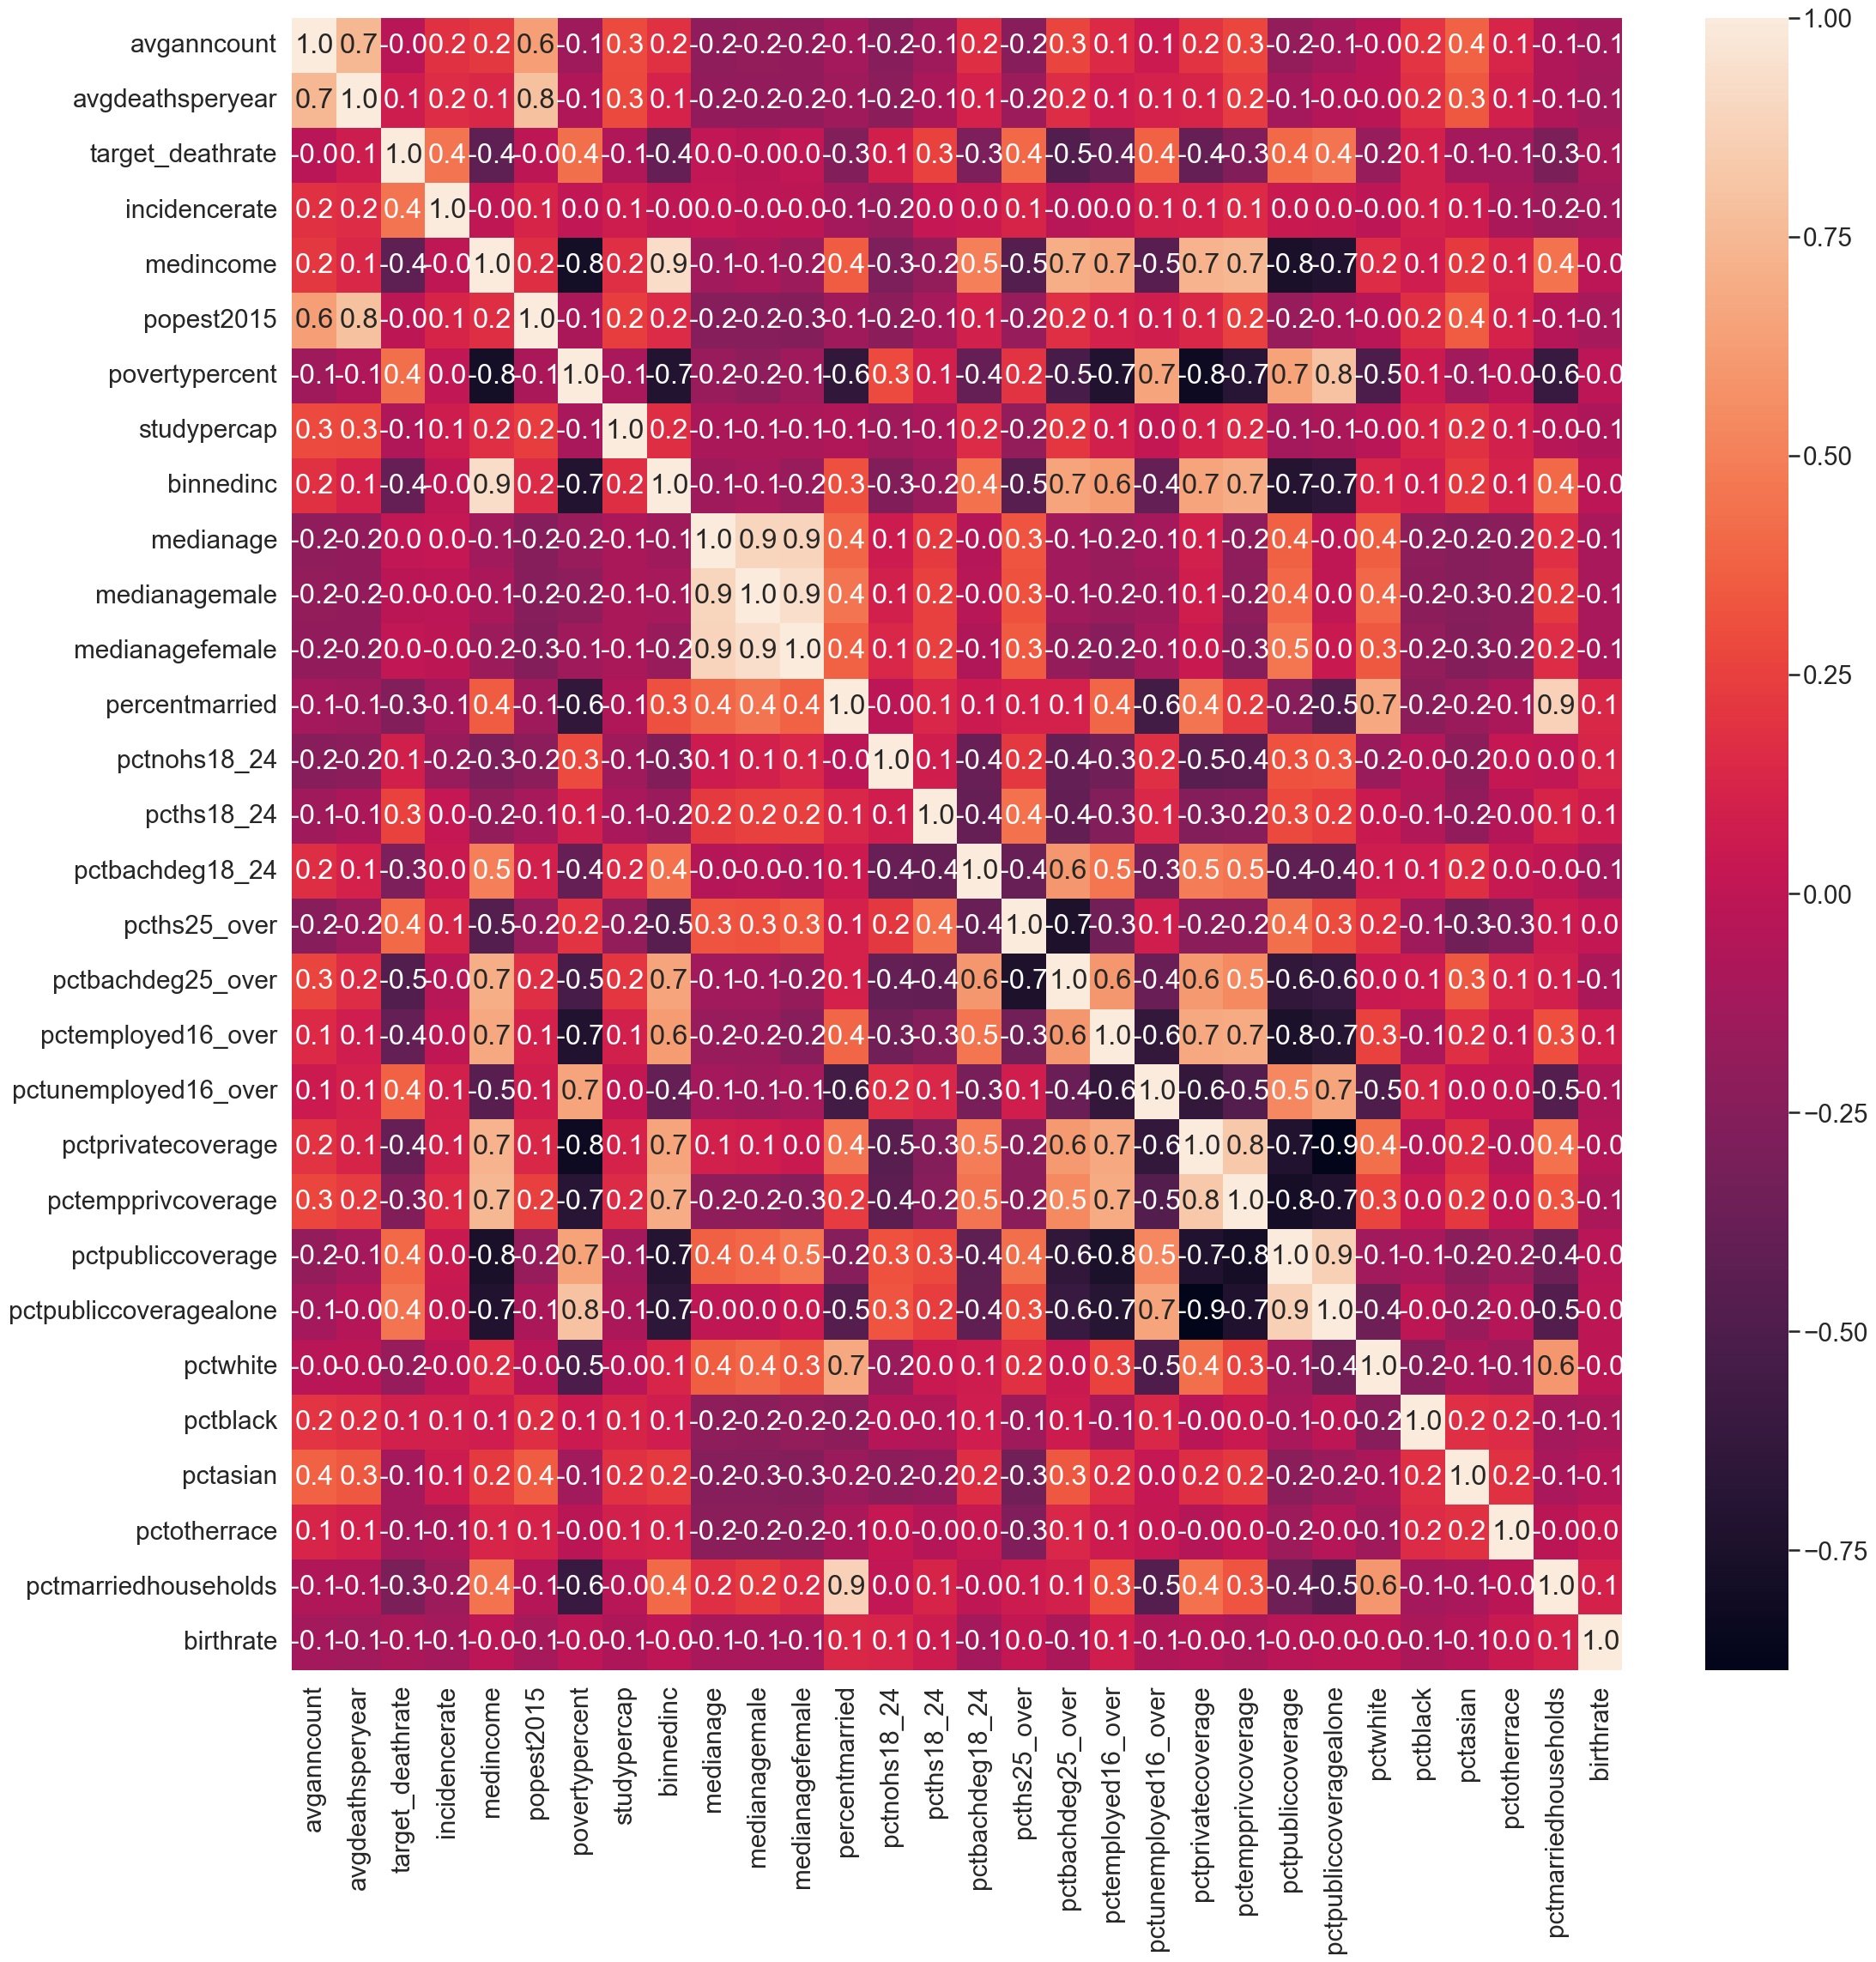

In [29]:
# check for correlation
visuals_data = cancer_cleaned.copy()
# numerical columns only
visuals_data = visuals_data.select_dtypes(include='number')

corr_matrix = visuals_data.corr()

plt.figure(figsize = (25,25))
sns.heatmap(corr_matrix, annot=True, fmt = '.1f')

. Most correlations between target_deathrate and independent variables are very weak (close to 0)
. That means linear regression may not perform well, because it relies heavily on linear correlations between predictors and the target.
. So we are going to implement:
  - Multiple Linear Regression as a benchmark
  - Regularized Linear Models (ElasticNet): Helps when predictors are weak but numerous and correlated
  - Tree-based Models (Random Forest and XGboost): Work well when linear correlation is weak and can capture non-linear and interaction effects between features.

In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error

# ------------------------------
# 1. Keep only numeric columns
# ------------------------------
cancer_numeric = cancer_cleaned.select_dtypes(include=[np.number])

# Define features and target
X = cancer_numeric.drop(columns=['target_deathrate'])
y = cancer_numeric['target_deathrate']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 2. Define Models
# ------------------------------
models = {
    "Linear Regression": LinearRegression(),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, max_iter=10000, random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42, n_jobs=-1)
}

# ------------------------------
# 3. Train + Cross-Validation on Training Set
# ------------------------------
kf = KFold(n_splits=5, shuffle=True, random_state=42)

results = {}

for name, model in models.items():
    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # scaling for linear models
        ('model', model)
    ])
    
    # Cross-validation R² on training set
    cv_scores = cross_val_score(pipeline, X_train, y_train, cv=kf, scoring='r2')
    
    # Fit on training data
    pipeline.fit(X_train, y_train)
    
    # Evaluate on test data
    y_pred = pipeline.predict(X_test)
    r2_test = r2_score(y_test, y_pred)
    rmse_test = mean_squared_error(y_test, y_pred)
    
    results[name] = {
        "CV R2 Mean": np.mean(cv_scores),
        "CV R2 Std": np.std(cv_scores),
        "Test R2": r2_test,
        "Test RMSE": rmse_test
    }

# ------------------------------
# 4. Display Results
# ------------------------------
results_df = pd.DataFrame(results).T
print(results_df.sort_values("Test R2", ascending=False))


                   CV R2 Mean  CV R2 Std   Test R2   Test RMSE
XGBoost              0.617682   0.038460  0.643544  291.668732
Random Forest        0.530236   0.036071  0.549281  368.798410
Linear Regression    0.501093   0.029617  0.508471  402.191684
ElasticNet           0.500415   0.028223  0.504648  405.319232


In [34]:
# As XGBoost is the best model, let's perform parameter tuning to improve it

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
from xgboost import XGBRegressor

# ------------------------------
# 1. Prepare Data
# ------------------------------
cancer_numeric = cancer_cleaned.select_dtypes(include=[np.number])

X = cancer_numeric.drop(columns=['target_deathrate'])
y = cancer_numeric['target_deathrate']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ------------------------------
# 2. Define Pipeline + Grid Search
# ------------------------------
pipeline = Pipeline([
    ('scaler', StandardScaler()),   # scaling is harmless here
    ('model', XGBRegressor(objective='reg:squarederror', random_state=42, n_jobs=-1))
])

# Hyperparameter grid
param_grid = {
    'model__n_estimators': [200, 300, 500],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.8, 1.0],
    'model__colsample_bytree': [0.8, 1.0]
}

# 5-fold CV
kf = KFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=kf,
    scoring='r2',
    n_jobs=-1,
    verbose=2
)

# ------------------------------
# 3. Run Grid Search
# ------------------------------
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV R2:", grid_search.best_score_)

# ------------------------------
# 4. Evaluate on Test Set
# ------------------------------
best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_test)
r2_test = r2_score(y_test, y_pred)
rmse_test = mean_squared_error(y_test, y_pred)

print("Test R2:", r2_test)
print("Test RMSE:", rmse_test)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'model__colsample_bytree': 1.0, 'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 500, 'model__subsample': 0.8}
Best CV R2: 0.6697744439620632
Test R2: 0.6852500272788107
Test RMSE: 257.5426785035903


In [38]:
test_data = X_test.iloc[[1]]
test_data

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
2367,781.0,267.0,450.2,47966,26643.0,22.6,0.0,46611.3,29.3,28.2,...,77.3,54.5,24.6,13.5,73.383844,12.588086,0.549812,0.978296,39.728702,3.467191


In [39]:
# predict an instance of the test set to compare actual and predicted value

test_data = X_test.iloc[[1]]

prediction = best_model.predict(test_data)

print(f'the predicted value is:{prediction} \n') 
print(f'the actual value is:{y_test.iloc[1]}')

the predicted value is:[164.35655] 

the actual value is:152.5


Top 5 Features by Importance:
pctbachdeg25_over    0.185268
incidencerate        0.138134
povertypercent       0.068741
pcths25_over         0.065594
medincome            0.049727
dtype: float32


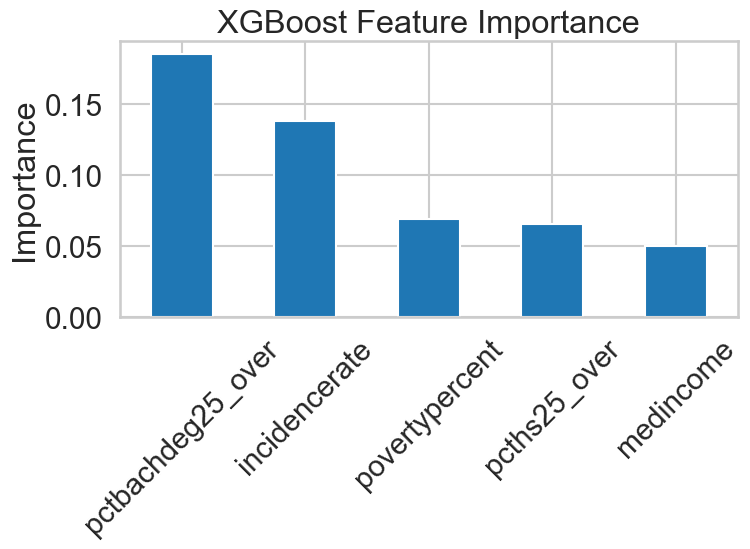

In [48]:
from xgboost import plot_importance

# Access the XGBoost model inside the pipeline
xgb_model = best_model.named_steps['model']

# Feature importance values
importance_values = xgb_model.feature_importances_

# Create a pandas Series for easy viewing and sorting
feature_importance = pd.Series(importance_values, index=X.columns).sort_values(ascending=False)

# Print top 10 features
print("Top 5 Features by Importance:")
print(feature_importance.head(5))

 # plot as bar chart
feature_importance.head(5).plot(kind='bar', figsize=(8,6), title='XGBoost Feature Importance', rot=45)
plt.ylabel('Importance')
plt.tight_layout()
plt.show()
